# Uso de MLFlow con tensorflow
**Guarda el modelo y los parametros en un archivo local**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# code paritally adapted from https://www.tensorflow.org/datasets/keras_example

batch_size=128
learning_rate=0.001
epochs=10

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
#   """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test,
)

train_loss=history.history['loss'][-1]
train_acc=history.history['sparse_categorical_accuracy'][-1]
val_loss=history.history['val_loss'][-1]
val_acc=history.history['val_sparse_categorical_accuracy'][-1]

print("train_loss: ", train_loss)
print("train_accuracy: ", train_acc)
print("val_loss: ", val_loss)
print("val_accuracy: ", val_acc)

tf.keras.models.save_model(model, "./model")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\mnist\3.0.1.incomplete2Y4PAL\mnist-train.tfrecord*...:   0%|          | 0/6000…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\mnist\3.0.1.incomplete2Y4PAL\mnist-test.tfrecord*...:   0%|          | 0/10000…

Dataset mnist downloaded and prepared to ~\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.
Epoch 1/10
469/469 [==============================] - 11s 4ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.1996 - val_sparse_categorical_accuracy: 0.9431
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1666 - sparse_categorical_accuracy: 0.9524 - val_loss: 0.1394 - val_sparse_categorical_accuracy: 0.9618
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.1137 - val_sparse_categorical_accuracy: 0.9669
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0942 - sparse_categorical_accuracy: 0.9729 - val_loss: 0.0972 - val_sparse_categorical_accuracy: 0.9698
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0753 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0852 - val_sparse_categorical_a

INFO:tensorflow:Assets written to: ./model\assets


MLFlow tracking

Now, let’s track the parameters, metrics, and also artifacts (models). See the code below, (also see complete code at the bottom). First, we need to name a run. We can even name an experiment (higher level of runs) if we want. Then, we use the functions log_param , log_metric , and log_artifacts to log parameters, metrics, and artifacts.

In [3]:
import mlflow
run_name = "mlruns"
with mlflow.start_run(run_name=run_name):
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_metric("train_loss", train_loss)
    mlflow.log_metric("train_accuracy", train_acc)
    mlflow.log_metric("val_loss", val_loss)
    mlflow.log_metric("val_accuracy", val_acc)
    mlflow.log_artifacts("./model")

**Carpeta mlruns :This is the place where parameters, metrics, and artifacts are stored locally**
<br>
No funciona si lo corremos en jupyter notebook (no se probo en jubyyer lab) solo en consola
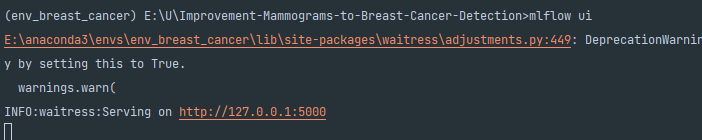

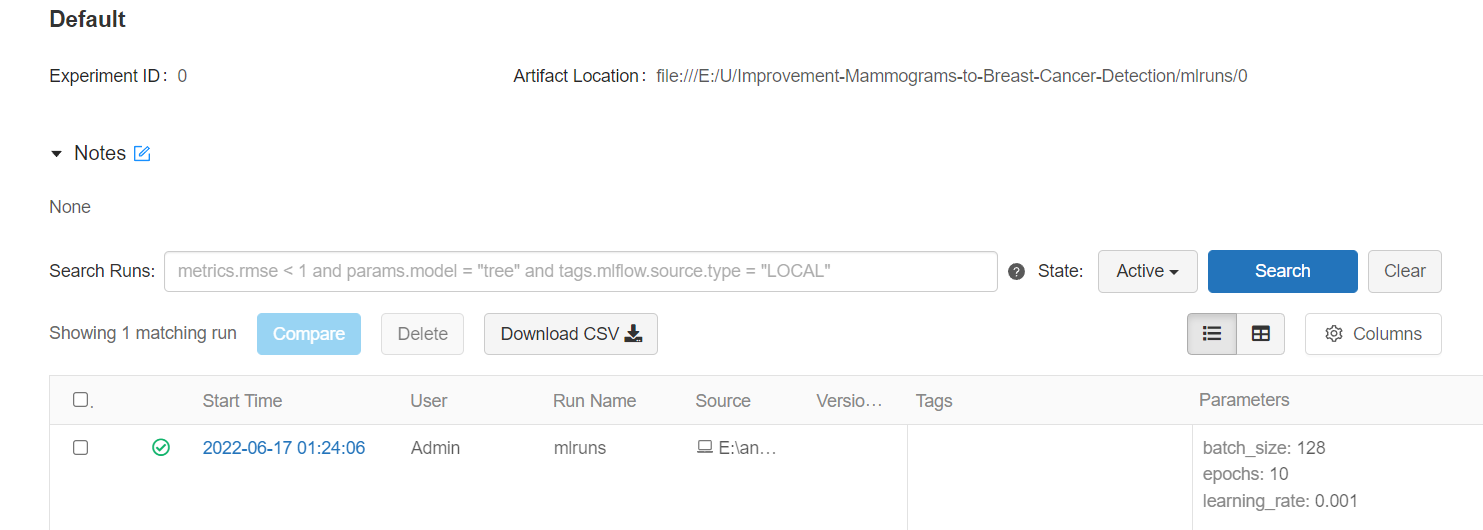

# Uso de registro de MFlow tutorial incompleto no lo hize

In [ ]:
import mlflow.tensorflow
from tensorflow.python.saved_model import signature_constants
tag=[tf.saved_model.tag_constants.SERVING]
key=signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY
mlflow.tensorflow.log_model(tf_saved_model_dir="./model",
                            tf_meta_graph_tags=tag,
                            tf_signature_def_key=key,
                            artifact_path="model",
                            registered_model_name="mnist")